## Observations and Insights 

1. Ramicane and Ketapril had a larger amount of participants than anyone else.
   Which gives them more chances to have better results.

2. Due to the measures of central tendacy (MCT) data, Ramicane and Capomulin have the best results.
   More easier to see in the boxplot.  All tumor sizes for these two drugs were less than 50!

3. There is a direct correlation between tumor volume and weight.  You could use inference to see if each drug has a similar
   average weight.  So one drug isn't just successful with smaller sized mice

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import seaborn as sns
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
# print(mouse_metadata.head())
# print(study_results.head())
# Combine the data into a single dataset
merged_df = pd.merge(mouse_metadata,study_results,on="Mouse ID")
# Display the data table for preview
merged_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
mice_count = len(merged_df['Mouse ID'].unique())

mice_count

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_df = merged_df.loc[merged_df.duplicated(subset=["Timepoint","Mouse ID"], keep=False)==True]
duplicate_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
index_df=merged_df.set_index('Mouse ID')
cleaned =index_df.drop(['g989'])
cleaned_df=cleaned.reset_index()


In [6]:
# Checking the number of mice in the clean DataFrame.
# clean_mice_count = len(cleaned_df['Mouse ID'].unique())
# clean_mice_count
len(cleaned_df['Mouse ID'].unique())

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
mean_tumor=cleaned_df.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
median_tumor=cleaned_df.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
std_tumor =cleaned_df.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
var_tumor=cleaned_df.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
sem_tumor=cleaned_df.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']
cleaned_df.describe()

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1880.000000,1880.000000,1880.000000,1880.000000,1880.000000
mean,12.757979,25.660106,19.606383,50.435293,1.025000
std,7.181998,3.935064,14.094238,8.914197,1.139971
min,1.000000,15.000000,0.000000,22.050126,0.000000
25%,7.000000,25.000000,5.000000,45.000000,0.000000
50%,13.000000,27.000000,20.000000,48.933454,1.000000
75%,19.250000,29.000000,30.000000,56.324075,2.000000
max,24.000000,30.000000,45.000000,78.567014,4.000000


In [39]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_df= pd.DataFrame({
        "Mean":mean_tumor,
        "Median":median_tumor,
        "Variance":var_tumor,
         "STD": std_tumor,
         "SEM":sem_tumor})
# summary_df
# Using the aggregation method, produce the same summary statistics in a single line
agg_data=cleaned_df.groupby('Drug Regimen')
agg_df=agg_data.agg(['mean','median','var','std','sem'])['Tumor Volume (mm3)']

agg_df.to_csv("data/Summary_Stats_Regimen.csv")
agg_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0.5, 1.0, 'Number of Mice Tested on Each Drug')

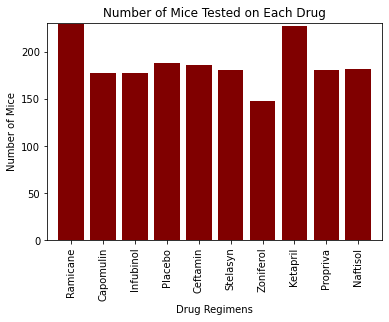

In [10]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.

#Pulling x and y data
total_ID=cleaned_df.groupby(['Drug Regimen']).count()["Mouse ID"]
x_axis=np.arange(len(total_ID))

#plotting bar chart
bar_chart1=plt.bar(x_axis,total_ID,color='maroon',align='center')

#store and convert variables to list for tick
drug_list=list(cleaned_df['Drug Regimen'].unique())

#tick labels and location
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drug_list, rotation="vertical")

#x and y limiters
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(total_ID)+1.0)

#labels
plt.xlabel("Drug Regimens")
plt.ylabel("Number of Mice")
plt.title("Number of Mice Tested on Each Drug")



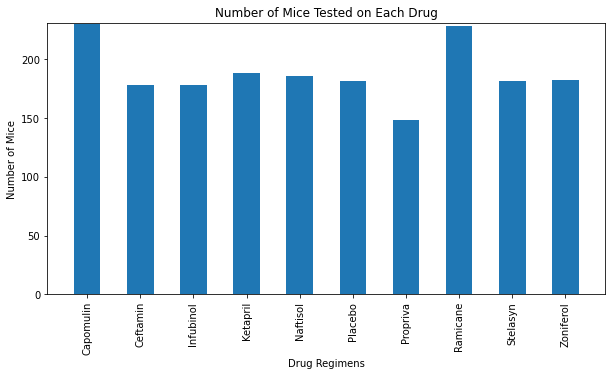

In [40]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
total_ID.plot(kind='bar', figsize=(10,5))
#labels
plt.xlabel("Drug Regimens")
plt.ylabel("Number of Mice")
plt.title("Number of Mice Tested on Each Drug")

#limiters
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(total_ID)+1.0)

#save image
plt.savefig("../Images/count_mice_drug.png", bbox_inches = "tight")

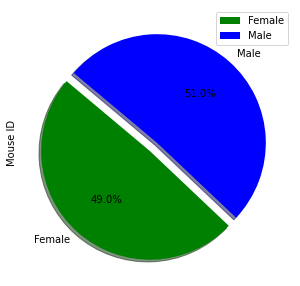

In [41]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

#store male and female data
gender_dist=cleaned_df.groupby(['Sex']).count()["Mouse ID"]
gender_dist

#pie chart attributes
colors=['green','blue']
explode=(0.1,0)

#plot pie chart
gender_dist.plot(kind='pie',y='Count per Gender',explode=explode,
                 startangle=140,colors=colors,shadow=True,figsize=(5,5),autopct="%1.1f%%")
plt.legend(loc='best')

#save
plt.savefig("../Images/gender_pie.png", bbox_inches = "tight")

(-1.187075692956477,
 1.109124456344466,
 -1.1892878343980988,
 1.1116395376706474)

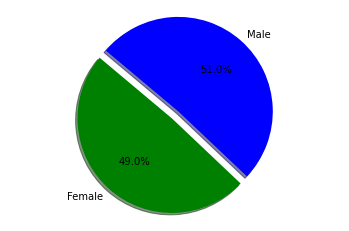

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels=["Female","Male"]

#create pie plot using py
plt.pie(gender_dist,labels=labels,explode=explode,startangle=140,
        colors=colors,shadow=True,autopct="%1.1f%%")

#set equal axis
plt.axis("equal")

## Quartiles, Outliers and Boxplots

In [42]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
best_results=cleaned_df.groupby('Mouse ID').max()['Timepoint']
best_results_df=pd.DataFrame(best_results)
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
best_merged_df=pd.merge(best_results_df,cleaned_df,on=('Mouse ID','Timepoint'))
best_merged_df.to_csv("data/final_merged_df.csv")
best_merged_df


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [46]:
# Put treatments into a list for for loop (and later for plot labels)
treatments=['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_cap=[]
tumor_ram=[]
tumor_inf=[]
tumor_cef=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles=best_merged_df['Tumor Volume (mm3)'].quantile([0.25,0.5,0.75])
lowerq=quartiles[.25]
upperq=quartiles[.75]
iqr=upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Tumor Values below {lower_bound} could be outliers.")
print(f"Tumor Values above {upper_bound} could be outliers.")
    # Locate the rows which contain mice on each drug and get the tumor volumes
    #pulling out value of tumor volume for each drug in the column and storing in above created list
for index, row in best_merged_df.iterrows():
    if row["Drug Regimen"] == 'Capomulin':
        tumor_cap.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == treatments[1]:
        tumor_ram.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == treatments[2]:
        tumor_inf.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == treatments[3]:
        tumor_cef.append(row['Tumor Volume (mm3)'])
    
    # add subset
final_df=pd.DataFrame({'Capomulin':tumor_cap,
                        treatments[1]: tumor_ram,
                       treatments[2]: tumor_inf,
                       treatments[3]: tumor_cef})
final_df    
    # Determine outliers of each top 4 drug using upper and lower bounds
quart_cap = final_df[treatments[0]].quantile([.25, .5, .75])
low_cap = quart_cap[.25]
med_cap = quart_cap[.5]
up_cap = quart_cap[.75]
iqr_cap = up_cap-low_cap
lowb_cap = low_cap - (1.5*iqr_cap)
upb_cap = up_cap + (1.5*iqr_cap)
max_cap = final_df[treatments[0]].max()
min_cap = final_df[treatments[0]].min()

quart_ram = final_df['Ramicane'].quantile([.25, .5, .75])
low_ram = quart_ram[.25]
med_ram = quart_ram[.5]
up_ram = quart_ram[.75]
iqr_ram = up_ram-low_ram
lowb_ram = low_ram - (1.5*iqr_ram)
upb_ram = up_ram + (1.5*iqr_ram)
max_ram = final_df[treatments[1]].max()
min_ram = final_df[treatments[1]].min()

quart_inf = final_df[treatments[2]].quantile([.25, .5, .75])
low_inf = quart_inf[.25]
med_inf = quart_inf[.5]
up_inf = quart_inf[.75]
iqr_inf = up_inf-low_inf
lowb_inf = low_inf - (1.5*iqr_inf)
upb_inf = up_inf + (1.5*iqr_inf)
max_inf = final_df[treatments[2]].max()
min_inf = final_df[treatments[2]].min()

quart_cef = final_df[treatments[3]].quantile([.25, .5, .75])
low_cef = quart_cef[.25]
med_cef = quart_cef[.5]
up_cef = quart_cef[.75]
iqr_cef = up_cef-low_cef
lowb_cef = low_cef - (1.5*iqr_cef)
upb_cef = up_cef + (1.5*iqr_cef)
max_cef = final_df[treatments[3]].max()
min_cef = final_df[treatments[3]].min()

#dataframe to display measures of central tendacy per drug
top4_df=pd.DataFrame({'Drug': treatments,
                     'Lower Quartiles':[low_cap,low_ram,low_inf,low_cef],
                     'Upper Quartiles':[up_cap,up_ram,up_inf,up_cef],
                     'IQR': [iqr_cap,iqr_ram,iqr_inf,iqr_cef],
                     'Median':[med_cap,med_ram,med_inf,med_cef],
                     'Upper Bound':[upb_cap,upb_ram,upb_inf,upb_cef],
                     'Lower Bound':[lowb_cap,lowb_ram,lowb_inf,lowb_cef],
                     'Max':[max_cap,max_ram,max_inf,max_cef],
                     'Min':[min_cap,min_ram,min_inf,min_cef]
                     })
top4_df_final=top4_df.groupby('Drug')

export_df=top4_df_final.sum()
export_df.to_csv('data/top4_mct_df')
export_df

Tumor Values below 17.10923096124998 could be outliers.
Tumor Values above 93.82025999125003 could be outliers.


,Lower Quartiles,Upper Quartiles,IQR,Median,Upper Bound,Lower Bound,Max,Min
Drug,,,,,,,,
Capomulin,32.377357,40.159220,7.781863,38.125164,51.832015,20.704562,47.685963,23.343598
Ceftamin,48.722078,64.299830,15.577752,59.851956,87.666458,25.355450,68.923185,45.000000
Infubinol,54.048608,65.525743,11.477135,60.165180,82.741446,36.832905,72.226731,36.321346
Ramicane,31.560470,40.659006,9.098537,36.561652,54.306811,17.912664,45.220869,22.050126


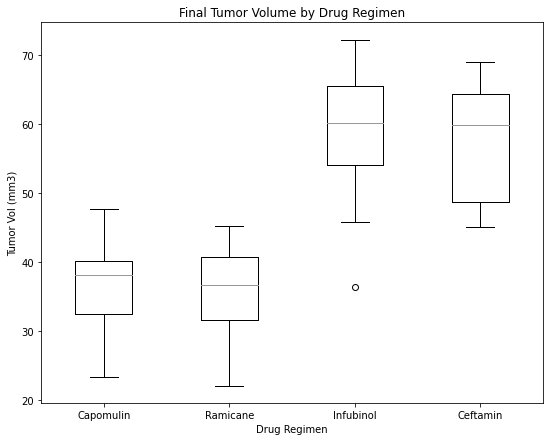

<Figure size 432x288 with 0 Axes>

In [47]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

#store list of each drug regimen and values
box_list=[final_df[treatments[0]],
          final_df[treatments[1]],
          final_df[treatments[2]],
          final_df[treatments[3]]
         ]
#construct chart for boxplot
fig1, ax = plt.subplots(figsize=(9,7))

#labels
ax.set_title('Final Tumor Volume by Drug Regimen')
ax.set_xlabel('Drug Regimen')
ax.set_ylabel('Tumor Vol (mm3)')
#setting boxplot parameters
ax.boxplot(box_list)

#setting tick labels
plt.xticks([1,2,3,4],treatments)
plt.show()

#save
plt.savefig("../Images/top4_box_plot.png", bbox_inches = "tight")


## Line and Scatter Plots

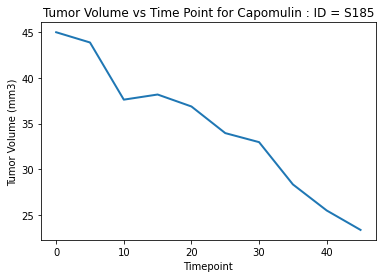

In [48]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#store Timepoint and Volume Data of specific ID
line_plotdf=cleaned_df.loc[cleaned_df['Mouse ID']=='s185',:]
x_axis=line_plotdf['Timepoint']
y_axis=line_plotdf['Tumor Volume (mm3)']

#set labels
plt.title('Tumor Volume vs Time Point for Capomulin : ID = S185')

#plot
plt.plot(x_axis,y_axis,linewidth=2)
#x and y labels
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')

#save
plt.savefig("../Images/line_plot_s185.png", bbox_inches = "tight")


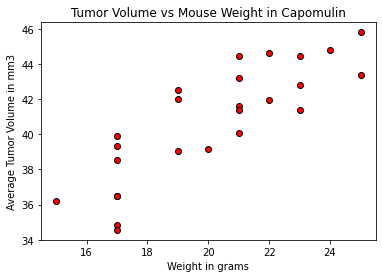

In [49]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
#store volume and weight values of capomulin regimen and get average
scatter_df= cleaned_df.loc[cleaned_df['Drug Regimen']=='Capomulin',:]
capavg= scatter_df.groupby(['Mouse ID']).mean()
#plot avg weight and tumor
plt.scatter(capavg['Weight (g)'],capavg['Tumor Volume (mm3)'],facecolors="red",edgecolors="black")
#labels
plt.xlabel('Weight in grams')
plt.ylabel('Average Tumor Volume in mm3')
plt.title('Tumor Volume vs Mouse Weight in Capomulin')
#save
plt.savefig("../Images/scatter_plot_capavg.png", bbox_inches = "tight")


## Correlation and Regression

In [35]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

#store correaltion equation
corr=round(st.pearsonr(capavg['Weight (g)'], capavg['Tumor Volume (mm3)'])[0],2)
print("The correlation between mouse weight and average tumor volume")
print(f'in the Capomulin drug is {corr}')

The correlation between mouse weight and average tumor volume
in the Capomulin drug is 0.84


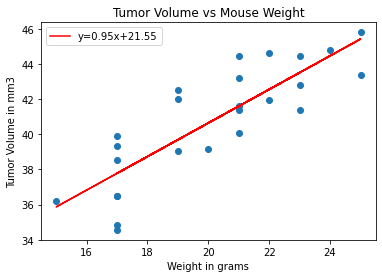

In [50]:
#pull variables for regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(capavg['Weight (g)'],capavg['Tumor Volume (mm3)'])

#set up variables for slope formula
regress_values = capavg['Weight (g)'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#plot chart
plt.scatter(capavg['Weight (g)'],capavg['Tumor Volume (mm3)'])
#plot slope line
plt.plot(capavg['Weight (g)'],regress_values,"r-",label='y={:.2f}x+{:.2f}'.format(slope,intercept))
#labels
plt.title('Tumor Volume vs Mouse Weight')
plt.xlabel('Weight in grams')
plt.ylabel('Tumor Volume in mm3')
plt.legend()

#save
plt.savefig("../Images/regression_model_capavg.png", bbox_inches = "tight")
